#### 讀取需要的函式庫

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import clear_output
from wordcloud import WordCloud
from PIL import Image
import seaborn as sns
from func import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import jieba
import sys
import re
import os
# re -> \d for number, \s for any space (\t\r\n...) 

#### 定義 addstopword 及 adddict 函式

In [2]:
def addstopword(data):
    stop = []
    if os.path.isfile('./stay.txt'):
        with open('./stay.txt', 'rb') as f:
                text = f.read()
                encode = chardet.detect(text)
        stay = list(map(str.strip, open('./stay.txt', 'r+', encoding=encode['encoding']).readlines()))
    else:
        stay = []
    length = len(data)
    index = 0
    value = ''
    tmp = ''
    while(index != length):
        if data[index] not in stay:
            print(data[index])
            value = input('Add to stop word [y:stopword/n:stayword/q:quit]: ')
            if value == 'y':
                if tmp == 'p': stay.remove(data[index])
                stop.append(data[index])
            elif value == 'n':
                if tmp == 'p': stop.remove(data[index])
                stay.append(data[index])
            elif value == 'p':
                index -= 2
            elif value == 'q':
                break
            clear_output()
        tmp = value
        index += 1
    return stop, stay


def addword():
    word = []
    while(True):
        # clear_output()
        value = input('Add to dictionay word [q:quit]: ')
        if value == 'q':
            break
        else:
            word.append(value)
    return word

#### 讀取資料夾中的資料

In [3]:
#path = '../../107-1PythonSampleCode/week_5/task_5/*.txt'
path = './first/*.txt'
title, data = readdir(path)


Number of files : 10


#### 顯示部份資料內容

In [4]:
for i in range(len(data)):
    print('----Document : {0}----'.format(title[i]))
    print(data[i][:10], '...', data[i][-10:-1], sep='\n', end='\n\n')

----Document : first01----
﻿1.鴻夏戀 郭台銘
...
今尚難定論。


----Document : first02----
﻿2.	
郭台銘進
...
，顯得顛簸。


----Document : first03----
﻿3.	親會夏普高層
...
召開記者會。


----Document : first04----
﻿4.	傳鴻海擬吃夏
...
「明智」的決定。

----Document : first05----
﻿5.	郭董為何苦追
...
市場 重要度：低

----Document : first06----
﻿6.	夏普社長示愛
...
界矚目焦點！


----Document : first07----
﻿7.	INCJ嗆鴻
...
的團結愛國之心。

----Document : first08----
﻿8.	「鴻夏戀」破
...
AVX締結合約。

----Document : first09----
﻿9.	夏普收購案背
...
組的標誌性案例。

----Document : first10----
﻿10.	夏普證實鴻
...
狂飆16.8%。



#### 新增詞彙至自定義詞庫，並匯入該詞庫
* savetofile(path, list_like_data)
* example for list_like_data:
  * [['來台']] : 完整 '來台' 字串被存入字典中
  * ['來台'] :　'來台' 視為獨立字元，存入 '來' '台' 於字典中 

In [5]:
# savetofile('./dict.txt', [['來台']])  # 完整字串　'來台'　被存入字典中
jieba.load_userdict('./dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.150 seconds.
Prefix dict has been built succesfully.


#### 新增詞彙至自定義停止詞彙中

In [6]:
stopwords = ['一','二','三','四','五','六','用','淨','利','值','前','據','談','自','至','曾','出',
            '合','最','供','而','個','很','得','達','家','進','所','夏','若','邱','但','中','可',
            '他','我','列','將','對','之','率','已','由','佔','本','日','月','年','另','故','於',
            '較','請','再','經','也','在','依','到','等','或','大','認列','不僅','讓','相關','最終',
            '把','沒','及','過去','認為','為','按','比','仍','係','後','及與','以','時','該','的',
            '並','更','就','註','有','事','來','不','從','堺','權','從','卻','說','要','今','度',
            '手','才','又','其','長','了','百','億','元','例如','可能','由於','因此','土城','一份',
            '上午','這份','多','赴','和','與','是','約','就是','只是','但是','如果','附註','部分',
            '事項','各位','品牌','集團','幅度','資產','新','台幣','日圓','億日圓','機構','面板','日元',
            '企業','報導','媒體','目前','提案','經營','實地','大阪','億元','以及','代工','一步','第二',
            '雙方','方案','分析','接受','成為','事業','目前','高橋','董事','營業','受到','提供','使用',
            '本年','說明','現金','成本','營業外','收入','結轉','分攤','其他','影響財務','詳合','結果',
            '不是','是否','最高','記者','超過','兩家','主幹','我們','除了','自己','立刻','','日本',
            '之間','不過','今天','然而','此外','工廠','預測','如下','之一','附註','附','註','其中',
            '因為','查核','報告增加','會計','相對','仟元','金額','權益','能力利益','股東','合理性',
            '假設','無形','上','開關鍵','模型','支出','控制','計算','資金評估','報告','因應','仟元',
            '金額','權益','假設','無形','上','模型','支出','控制','計算資金','評估','人次','重大',
            '資訊','總額','民國','估計','一副','公司','年度','包括','正確性','正','確性','減損','共為',
            '預估','預算','去年同期','應該','雖然','下午','要求','一樣','一家','維持','公開','整體',
            '表示','特性','市場','科目','發生','年本','重要','判斷','主要','流量','意見','關鍵','同期',
            '評價','正確','地區','總資產','執行','程序','測試','稅後淨利','股份有限公司','蘋果','鴻海',
            '夏普','郭台銘','鴻夏戀','iPhone','1','2','3','4','5','6','7','8','9','0','NT','2012',
            '10','三星','供應商','INCJ','案','LG','會','下','買','電子','清單','向','都','郭董',
            '能力','進','廠','內','購','併','這','看','人','被','能','外界','指出','五日','不同','陷入',
            '出現','一年','什麼','安倍','這個','可以','一個','同時','去年','部門','二月','這是','月底',
            '完成','財務','今年','階段','子公司','條件','引述','召開','擁有','有助','持有','進入','旗下',
            '已經','入座','罩','業務','顯示','尺寸','萬張','取得','高達','持續','進行','人士','提出',
            '社長','加工','內容','總部','沒有','加上','決定','群創','最大','四年','代廠','做','鴻','高',
            '市','不會','傳出','文件','客戶超過','SDP','JDI','IGZO','Display','WitsView','NHK',
            '12','7000','3500','2015','2016','25','30','000','29']
puncs_Full = '！？｡＂＃＄％＆＇（）()＊＋，－／：；＜＝＞＠［＼］$＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'
puncs_Half = "!?.#$%&'()*+,-/:;<=>@[]^_{}|~\\\""
savetofile('./stopword.txt', [stopwords, puncs_Full, puncs_Half])

In [7]:
stopword = readdir('./stopword.txt')[1][0].split('\n')
stopword.append('\n')
stopword[0:10]


Number of files : 1


['一', '二', '三', '四', '五', '六', '用', '淨', '利', '值']

#### 利用 jieba 對文件進行斷字，並統計字詞頻率，顯示前十名資料

In [8]:
wordDictionary = []
for i in range(len(data)):
    seg_list = jieba.cut(data[i], cut_all=False)
    seg_list = list(seg_list)
    wordDict = {}
    for w in seg_list:
        if (w not in stopword) and (w not in puncs_Full) and (w not in puncs_Half):
            if w in wordDict:
                wordDict[w] = wordDict[w] + 1
            else:
                wordDict[w] = 1
    wordDictionary.append(wordDict)
    print('Number of word in document ({0}) : '.format(title[i]), len(wordDict))
    sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
    print(sort[0:10])
    data[i] = ' '.join(jieba.cut(data[i], cut_all=False))

Number of word in document (first01) :  442
[('\r\n', 56), ('重整', 7), ('產業', 7), ('台灣', 7), ('銀行', 6), ('談判', 6), ('革新', 6), ('協議', 6), ('〈', 5), ('〉', 4)]
Number of word in document (first02) :  512
[('\r\n', 71), ('技術', 16), ('談判', 6), ('優先', 6), ('希望', 6), ('OLED', 5), ('產品', 5), ('零件', 5), ('台灣', 5), ('掌握', 5)]
Number of word in document (first03) :  317
[('\r\n', 74), ('合作', 9), ('未來', 4), ('股權', 4), ('時間', 4), ('投資', 4), ('小時', 3), ('計劃', 3), ('參與', 3), ('國外', 3)]
Number of word in document (first04) :  166
[('\r\n', 14), ('股權', 4), ('收購', 4), ('銀行', 3), ('希望', 3), ('外傳', 3), ('搶', 2), ('最新版', 2), ('郭', 2), ('此', 2)]
Number of word in document (first05) :  452
[('\r\n', 96), ('技術', 15), ('全球', 10), ('○', 8), ('效益', 8), ('碩', 5), ('未來', 5), ('產品', 5), ('平板', 4), ('手機', 4)]
Number of word in document (first06) :  188
[('\r\n', 19), ('合作', 4), ('援助', 3), ('十代', 3), ('成功', 3), ('找', 3), ('正果', 2), ('萬片', 2), ('沒來', 2), ('似乎', 2)]
Number of word in document (first07) :  150
[('\r\n', 

#### 顯示各文件低於閥值 (limit) 的字詞

In [9]:
limit = 0
wordsperdocument = 50
for i in range(len(data)):
    count = 0
    print('----Document : {0}----'.format(title[i]))
    for ind, value in wordDictionary[0].items():
        if (value <= limit) & (count != wordsperdocument):
            count += 1
            print(ind, end = ', ')
    print()

----Document : first01----

----Document : first02----

----Document : first03----

----Document : first04----

----Document : first05----

----Document : first06----

----Document : first07----

----Document : first08----

----Document : first09----

----Document : first10----



#### 利用 wordDictionary 移除出現次數低於閥值 (limit) 的字詞，並顯示部份結果

In [10]:
for i in range(len(data)):
    for key, value in wordDictionary[0].items():
        if value <= limit:
            data[i] = data[i].replace(key, '')
    print('document :', title[i])
    print(data[i][:50], '...', data[i][-50:-1], sep='', end='\n\n')

document : first01
﻿ 1 . 鴻夏戀   郭台銘 沒學 的 「 大阪 談判術 」 
 鴻夏戀 談 了 四年 ， 過程... 為 目標 。 只是 鴻海 和 夏普 的 合作 談判 很 脆弱 ， 至今 尚難 定論 。 
 

document : first02
﻿ 2 . 	 
 郭台銘 進擊 碰壁 ： 鴻夏戀 仍 原地踏步 ？ 
 峰 迴 路轉 ， 撲 ...有 來 到 郭台銘 手上 ？ 邁向鴻夏 「 結婚 」 的 最後一哩路 ， 顯得 顛簸 。 
 

document : first03
﻿ 3 . 	 親會 夏 普高 層   郭台銘 ： 完成 九成   盼 29 日 簽約 
 鴻海 ...。 據 報導 ， 郭董 表示 ， 將在 2 月 29 日 就 夏普 案召開 記者 會 。 
 

document : first04
﻿ 4 . 	 傳 鴻海 擬吃 夏普 2 ／ 3 股權 
 鴻海 搶親 夏普 （ Sharp ） ...在 仔細 比 較 鴻海 和 INCJ 提案 後 ， 可以 做出 最 「 明智 」 的 決定 。 

document : first05
﻿ 5 . 	 郭董 為 何苦 追錢 坑 夏普 ？ 
 鴻海 集團 董事 長 郭台銘 在 外商 採...鴻海 有 科技 技術 與 量產 能力 ， 可結合 搶攻 智慧 家庭 市場   重要 度 ： 低 

document : first06
﻿ 6 . 	 夏普 社長 示愛   重燃鴻夏戀 
 夏普 才剛 接受 堺 市 十代 廠 SDP ...像 空間 ， 看來鴻夏戀 成不成 ， 明天 鴻海 股東會 ， 將成 外界 矚目 焦點 ！ 
 

document : first07
﻿ 7 . 	 INCJ 嗆 鴻海 是 要 吃掉 夏普 
 日本 產業 革新 機構 （ Ｉ Ｎ Ｃ...銘 就算 今天 想當 一回 稻盛和夫 ， 恐怕 也 敵不過 日本 人 的 團結 愛國 之心 。 

document : first08
﻿ 8 . 	 「 鴻夏戀 」 破局   敗給 團結 的 日本 
 鴻海 併 夏普 的 「 鴻夏戀...此 ， 力排 眾議 ， 以 高出 原股價 一倍 多 的 72 美元 與 AVX 締結合 約 。 

document : first09
﻿ 9 . 	 夏普 收購案 背 後

#### 移除所有標點符號、非中文英文數字之資料

In [11]:
for i in range(len(data)):
    data[i] = re.sub('[^\u4e00-\u9fff ]', '', data[i])
#[^\u4e00-\u9fff A-Za-z0-9]

#### 印出部份斷字結果

In [12]:
for i in range(len(data)):
    print('document :', title[i])
    print(data[i][:20], ' ... ', data[i][-20:-1], sep='', end='\n\n')

document : first01
   鴻夏戀   郭台銘 沒學 的  大 ... 談判 很 脆弱  至今 尚難 定論  

document : first02
     郭台銘 進擊 碰壁  鴻夏戀  ... 婚  的 最後一哩路  顯得 顛簸  

document : first03
    親會 夏 普高 層   郭台銘  ...   日 就 夏普 案召開 記者 會  

document : first04
    傳 鴻海 擬吃 夏普    股權 ...  可以 做出 最  明智  的 決定 

document : first05
    郭董 為 何苦 追錢 坑 夏普  ...  智慧 家庭 市場   重要 度  低

document : first06
    夏普 社長 示愛   重燃鴻夏戀 ...  股東會  將成 外界 矚目 焦點  

document : first07
     嗆 鴻海 是 要 吃掉 夏普  ... 不過 日本 人 的 團結 愛國 之心 

document : first08
     鴻夏戀  破局   敗給 團結 ... 倍 多 的  美元 與  締結合 約 

document : first09
    夏普 收購案 背 後 的 光和影 ...  電子業界 重組 的 標誌 性 案例 

document : first10
    夏普 證實 鴻海 具優勢  郭董 ... 新高 水準  夏普  日收盤 狂飆  



#### 初始化 TFIDF 物件，用以計算 tfidf

In [13]:
tfidf_vectorizer = TfidfVectorizer(max_df = 1, min_df = 0, analyzer = 'word'
                                   , stop_words = stopword, max_features = 10000)
#tfidf_vectorizer = CountVectorizer(stop_words = stopword)

#### 顯示初始化時輸入的停止詞彙 

In [14]:
print(tfidf_vectorizer.get_stop_words())

frozenset({'', '等', '事業', '對象', 'INCJ', '假設', '之丁', '會計師', '而', '曾', '三千五百', '查核', '以人', '之研', '之劃', '規劃', '比', '今年', '＾', '之約', '依上', '且並', '家', '但本', '三名', '一回', '｢', '二親', '7000', '各位', '並監控', '六', '乃來', '】', '以', '三十分', '也將', 'WitsView', '總資產', '並引', '供', '仍會', '上述', '代工', '稻盛和夫', '！', '並合', '之半', '位達', '之會計', '入座', '群創', '促進本', '給出', '模型', '－', '此外', '之平', '陷入', '依循', '共為', '預算', '判斷', '召開', '一九', '乏力', '仟片', '以來', '並重', '利益', '之場', '日本', '伍拾', '做', '&', '–', '他們', '一新', '更', '仍', '就是', '10', '控制', '一四會計', '之執', '〃', '之時', '幅度', '。', '進行', '之持', '﹏', '或', '下方', '事及', '程序', '只是', '三等', '億日', '上斷', '2012', '〚', '供質', '以千', '這是', '一千', '能力', '上週', '其他', '經', '傳輸時', '超過', '下本', '並稱', '赴', '七年', '一套', '一月底', '上半年', '之獨', '稻盛', '計師', '百', '關鍵', '完成', '9', '形容', '不包', '二月', '正', '並檢', '｜', '中境', '五', '並無', '之永', '高橋', '一項', '｝', '董事', '按', ' ', '對', '了', '夏普', '之任', '｣', '並於給', '之部門', '一位', '下來', '並以', '一龍', '機構', '一度', '之架構', '因為', '方案', '無疑', '就', '不可', '條件', '仟個', '2', '淨', '事', 'NT',

#### 計算 TFIDF 詞頻矩陣

In [15]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

/home/dongdong/.local/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['display', 'igzo', 'incj', 'iphone', 'jdi', 'lg', 'nhk', 'nt', 'sdp', 'witsview'] not in stop_words.
  sorted(inconsistent))


#### 顯示 TFIDF 詞頻矩陣大小

In [16]:
tfidf_matrix.shape

(10, 1582)

#### 顯示部份 TFIDF 詞頻矩陣中的字詞

In [17]:
words = tfidf_vectorizer.get_feature_names()
print(words[0:50])

['上市', '上海', '上漲', '下台', '下滑', '下跌', '中國大陸', '中央社', '中階', '主導性', '主管', '主義經濟', '之後股價', '予人景氣', '事情', '事業營', '事要', '二二', '二是', '五十二', '五十元', '五千', '五年', '五成', '五美元', '五點', '亞洲', '交代', '交易', '交易所', '交流', '交給', '亮眼', '人並', '人員', '人均', '人才', '人才流失', '人稻', '人達成', '仁寶', '仁寶等', '介入', '仍不離', '仍強', '仍處', '仔細', '代表性', '以下', '以交換']


#### 顯示 TFIDF > 閥值 (limit) 的資料

In [ ]:
f, ax = plt.subplots(figsize=(12,10))
plt.title('Pearson Correlation of Movie Features')
sns.heatmap(movie_num.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

In [45]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(data.values)

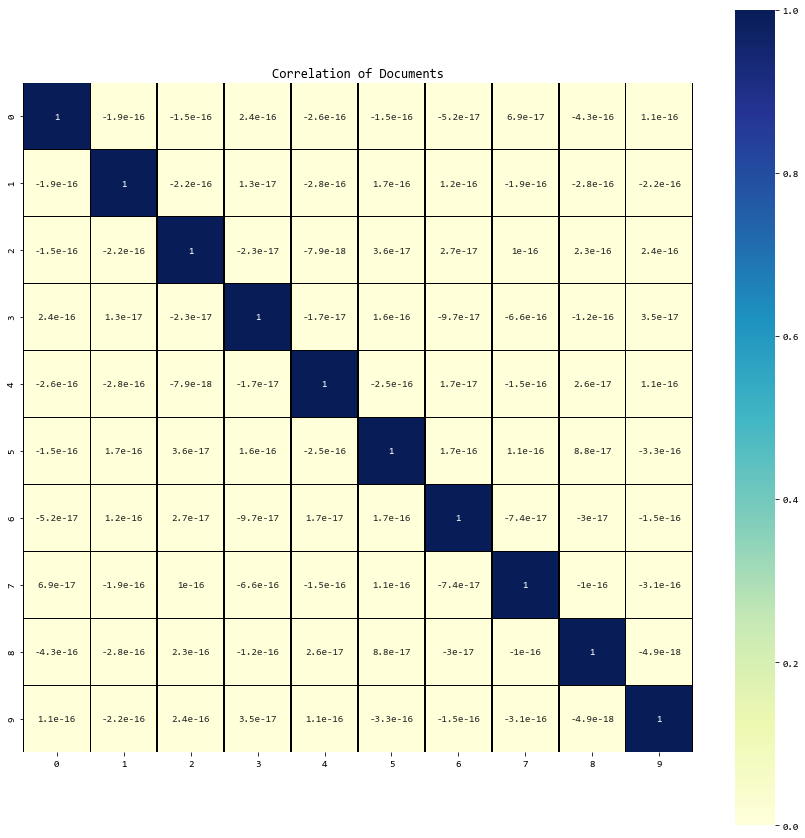

In [53]:
f, ax = plt.subplots(figsize=(15,15))
plt.title('Correlation of Documents', fontsize = 13)
sns.heatmap(data.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

In [54]:
pca = PCA()
pca_value = pca.fit_transform(X_std)

In [55]:
pca_value

array([[-6.27773600e-02,  9.37931185e-01,  7.88490969e-01, ...,
        -2.21909261e+00, -1.04147392e+00,  1.65803901e-01],
       [ 2.33181245e-01, -1.39303797e+00, -1.34095701e+00, ...,
        -1.25128996e-01,  2.69728980e-14,  2.99010340e-01],
       [-7.13140250e-01,  1.65469009e-01,  3.68054507e-03, ...,
        -9.80281495e-02,  7.27814248e-01, -3.43603566e-01],
       ...,
       [ 6.46519678e-01,  4.83218156e-01, -5.73324656e-01, ...,
        -5.26987551e-01, -7.88923684e-01, -1.91140121e-01],
       [ 7.27037325e-01, -4.96567097e-01,  3.67012522e-01, ...,
        -1.14582752e-01, -1.39642414e-01,  3.97030345e-02],
       [-8.66593489e-01,  8.85450428e-01, -5.17192670e-01, ...,
        -8.88998991e-02, -1.34381635e-01, -6.81699047e-01]])

In [57]:
pca = PCA(n_components=7)
x_7d = pca.fit_transform(X_std)

In [58]:
pca4 = PCA(n_components=4)
x_4d = pca.fit_transform(X_std)

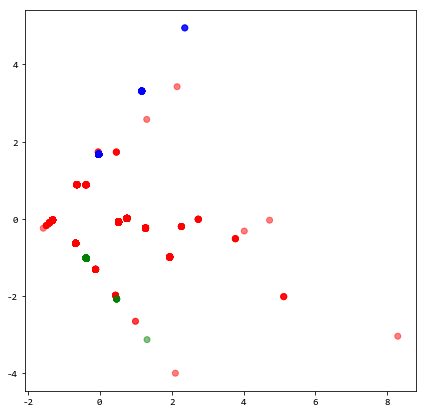

In [61]:
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 3)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_7d)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_7d[:,0],x_7d[:,2], c= label_color, alpha=0.5) 
plt.show()

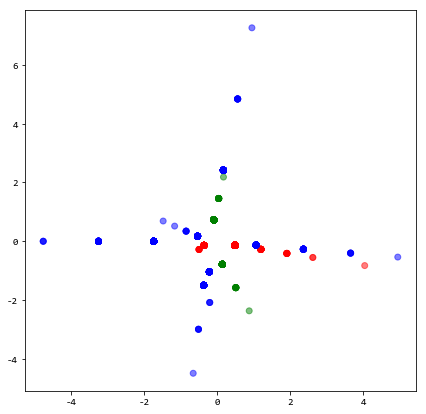

In [62]:
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 3)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_4d)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_4d[:,0],x_4d[:,2], c= label_color, alpha=0.5) 
plt.show()